In [91]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

In [92]:
df = pd.read_csv('data/exposes-berlin.csv', index_col=0).replace({'None': np.nan, True: 1, False: 0})
df = df[(df.zipcode.notnull()) & (df.zipcode != '37127')]
df['total_rent'] = pd.to_numeric(df['total_rent'])
df['living_space'] = pd.to_numeric(df['living_space'])
df['rooms'] = pd.to_numeric(df['rooms'])
df['age'] = pd.to_numeric(df['age'])
df['floor'] = pd.to_numeric(df['floor'])
df['zipcode'] = df['zipcode'].apply(lambda zc: 'zc_' + str(zc))
df['price_per_m2'] = df.total_rent / df.living_space

In [93]:
df.shape

(3330, 14)

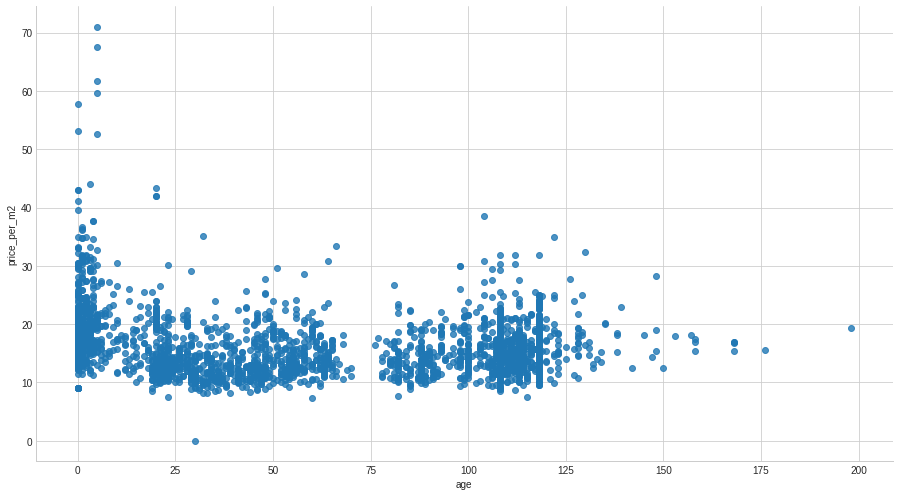

In [94]:
sns.lmplot('age',
           'price_per_m2',
           data=df,
           fit_reg=False,
           size=7,
           aspect=1.8);

In [95]:
dummy_zipcodes = pd.get_dummies(df.zipcode)
df_with_dummies = df.join(dummy_zipcodes)
dummies_formula = ' + '.join(map(str, dummy_zipcodes.columns.values))

In [96]:
df_with_dummies.shape

(3330, 206)

In [97]:
import statsmodels.formula.api as sm
import statsmodels.api as sms

In [98]:
result = sm.ols(
    formula="""
                total_rent ~
                living_space +
                age +
                floor +
                has_balcony +
                has_kitchen +
                has_cellar +
                has_elevator +
                needs_wbs +
            """ + dummies_formula,
    data=df_with_dummies
).fit()

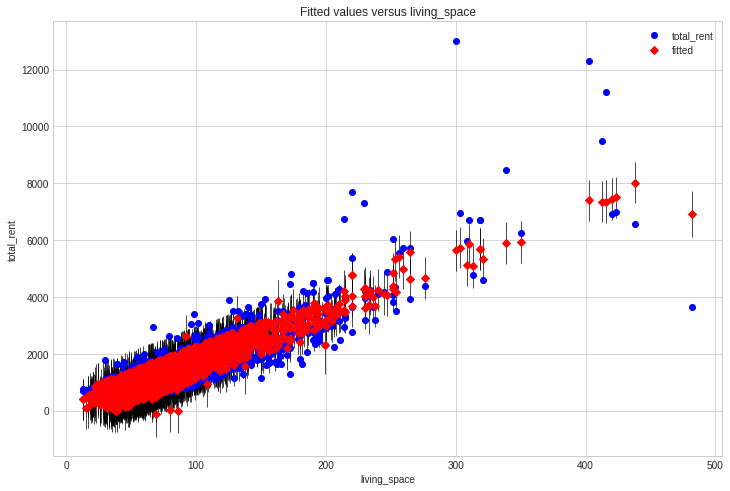

In [108]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sms.graphics.plot_fit(result, 'living_space', ax=ax)

In [116]:
params = result.params
living_space = 64.14
age = 2018 - 1900
floor = 4
has_balcony = 1
has_kitchen = 0
has_cellar = 0
has_elevator = 0
needs_wbs = 0
zip_code = '12347'
expected_price = params['Intercept'] + \
                 params['living_space'] * living_space + \
                 params['age'] * age + \
                 params['floor'] * floor + \
                 params['has_balcony'] * has_balcony + \
                 params['has_kitchen'] * has_kitchen + \
                 params['has_cellar'] * has_cellar + \
                 params['has_elevator'] * has_elevator + \
                 params['needs_wbs'] * needs_wbs + \
                 params['zc_' + zip_code]
expected_price

662.7967844896536